In [2]:
import imageio
import matplotlib.pyplot as plt
import numpy as np

In [18]:
%load_ext autoreload
%autoreload 2
import features
import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
path = "../INRIAPerson/train_64x128_H96/pos/crop001001a.png"

In [4]:
img = imageio.imread(path)

In [6]:
img = img / 255

In [7]:
img.shape

(160, 96, 4)

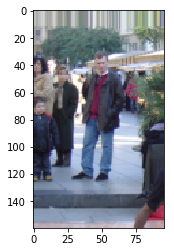

In [8]:
plt.imshow(img)

In [9]:
row, col = img.shape[0], img.shape[1]

In [11]:
row_off, col_off = (row - 128) // 2, (col - 64) // 2

In [13]:
cimg = img[row_off : row - row_off, col_off : col - col_off]

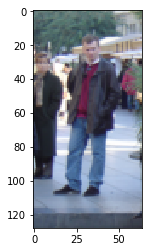

In [15]:
plt.imshow(cimg)

In [19]:
cimg = utils.load_image(path)

In [39]:
mag, theta = features.gradient(cimg)

dx1: (128, 64)
dx1: (128, 64)
dx1: (128, 64)
shape of dxs: (3, 128, 64), dys: (3, 128, 64)
shape of dx: (128, 64), dy: (128, 64)


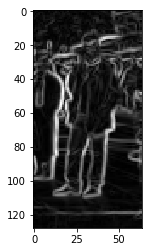

In [42]:
plt.imshow(mag, cmap = "gray")

In [45]:
import math
-math.pi

-3.141592653589793

In [43]:
theta

array([[ 0.38050638,  0.55165498,  0.49934672, ..., -2.40565906,
        -2.07407076, -1.76819189],
       [ 1.10714872,  0.97074611, -1.05840687, ..., -2.50816677,
        -1.7577756 , -0.48689923],
       [ 0.38831872,  1.74546853, -2.16414647, ..., -0.3453008 ,
        -0.25732371, -0.15776874],
       ...,
       [ 2.8753406 ,  2.03444394,  1.57079633, ..., -3.07917384,
         2.91479381, -2.97644398],
       [ 2.9562447 ,  2.74307021,  2.76860493, ..., -3.03671571,
         3.10315006,  3.10934577],
       [ 2.8753406 ,  2.55359005,  2.67794504, ..., -2.53604799,
        -3.03093543,  2.99270271]])

In [65]:
bins = np.linspace(0, math.pi, num = 10)

In [66]:
bins

array([0.        , 0.34906585, 0.6981317 , 1.04719755, 1.3962634 ,
       1.74532925, 2.0943951 , 2.44346095, 2.7925268 , 3.14159265])

In [67]:
ori = features.bin_gradient(theta, 9)

[[0.38050638 0.55165498 0.49934672 ... 0.73593359 1.0675219  1.37340077]
 [1.10714872 0.97074611 2.08318579 ... 0.63342588 1.38381706 2.65469342]
 [0.38831872 1.74546853 0.97744618 ... 2.79629185 2.88426894 2.98382392]
 ...
 [2.8753406  2.03444394 1.57079633 ... 0.06241881 2.91479381 0.16514868]
 [2.9562447  2.74307021 2.76860493 ... 0.10487694 3.10315006 3.10934577]
 [2.8753406  2.55359005 2.67794504 ... 0.60554466 0.11065722 2.99270271]]


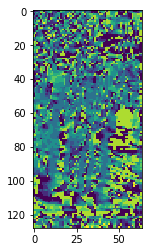

In [68]:
plt.imshow(ori)

In [69]:
ori.shape

(128, 64)

In [70]:
ori

array([[1, 2, 2, ..., 2, 3, 4],
       [3, 3, 6, ..., 2, 4, 7],
       [1, 5, 3, ..., 8, 8, 8],
       ...,
       [8, 6, 5, ..., 1, 8, 1],
       [8, 7, 8, ..., 1, 8, 8],
       [8, 7, 7, ..., 2, 1, 8]])

In [71]:
theta

array([[0.38050638, 0.55165498, 0.49934672, ..., 0.73593359, 1.0675219 ,
        1.37340077],
       [1.10714872, 0.97074611, 2.08318579, ..., 0.63342588, 1.38381706,
        2.65469342],
       [0.38831872, 1.74546853, 0.97744618, ..., 2.79629185, 2.88426894,
        2.98382392],
       ...,
       [2.8753406 , 2.03444394, 1.57079633, ..., 0.06241881, 2.91479381,
        0.16514868],
       [2.9562447 , 2.74307021, 2.76860493, ..., 0.10487694, 3.10315006,
        3.10934577],
       [2.8753406 , 2.55359005, 2.67794504, ..., 0.60554466, 0.11065722,
        2.99270271]])